In [1]:
%matplotlib inline

In [2]:
# Copyright (c) 2015-2018 MetPy Developers.
# Distributed under the terms of the BSD 3-Clause License.
# SPDX-License-Identifier: BSD-3-Clause

# Smoothing

Using MetPy's smoothing functions.

This example demonstrates the various ways that MetPy's smoothing function
can be utilized. While this example utilizes basic NumPy arrays, these
functions all work equally well with Pint Quantities or xarray DataArrays.

In [3]:
from itertools import product

import matplotlib.pyplot as plt
import numpy as np

import metpy.calc as mpcalc

Start with a base pattern with random noise

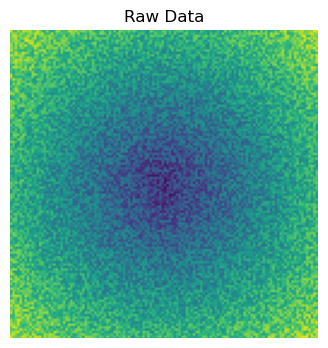

In [4]:
rng = np.random.default_rng(61461542)
size = 128
x, y = np.mgrid[:size, :size]
distance = np.sqrt((x - size / 2) ** 2 + (y - size / 2) ** 2)
raw_data = rng.random((size, size)) * 0.3 + distance / distance.max() * 0.7

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.set_title('Raw Data')
ax.imshow(raw_data, vmin=0, vmax=1)
ax.axis('off')
plt.show()

Now, create a grid showing different smoothing options

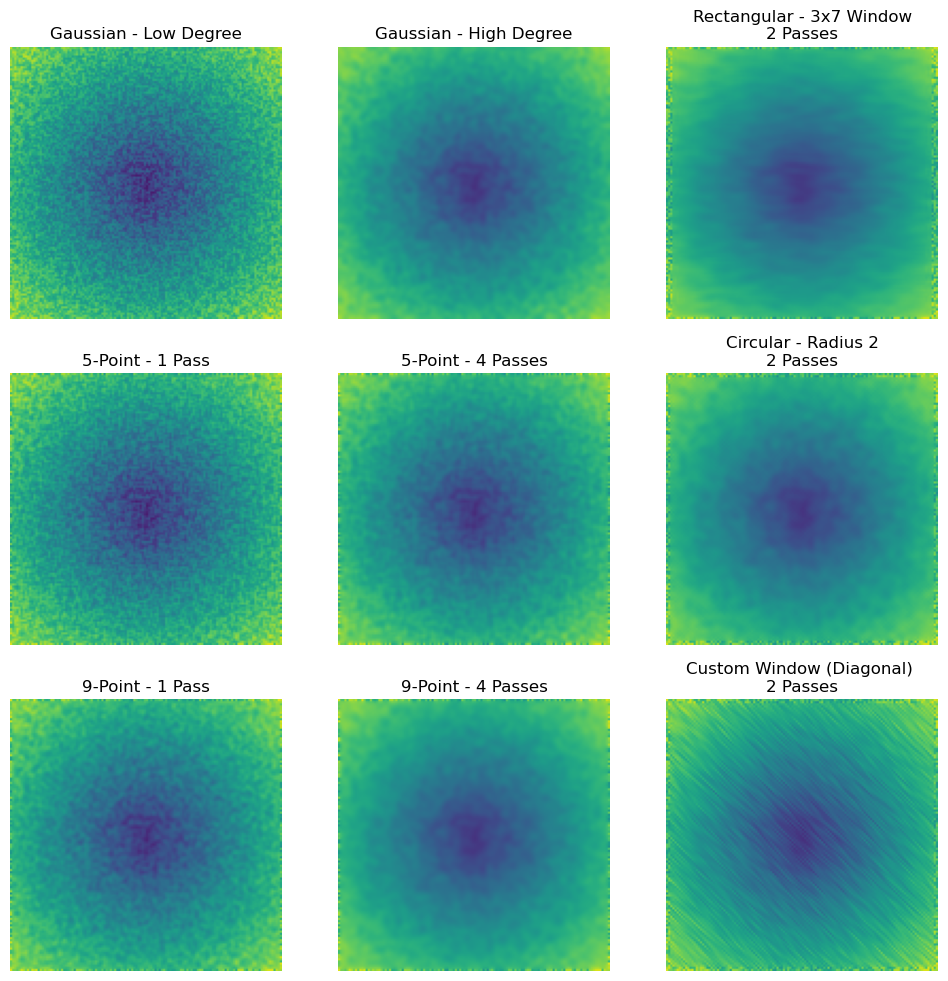

In [5]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
for i, j in product(range(3), range(3)):
    ax[i, j].axis('off')

# Gaussian Smoother
ax[0, 0].imshow(mpcalc.smooth_gaussian(raw_data, 3), vmin=0, vmax=1)
ax[0, 0].set_title('Gaussian - Low Degree')

ax[0, 1].imshow(mpcalc.smooth_gaussian(raw_data, 8), vmin=0, vmax=1)
ax[0, 1].set_title('Gaussian - High Degree')

# Rectangular Smoother
ax[0, 2].imshow(mpcalc.smooth_rectangular(raw_data, (3, 7), 2), vmin=0, vmax=1)
ax[0, 2].set_title('Rectangular - 3x7 Window\n2 Passes')

# 5-point smoother
ax[1, 0].imshow(mpcalc.smooth_n_point(raw_data, 5, 1), vmin=0, vmax=1)
ax[1, 0].set_title('5-Point - 1 Pass')

ax[1, 1].imshow(mpcalc.smooth_n_point(raw_data, 5, 4), vmin=0, vmax=1)
ax[1, 1].set_title('5-Point - 4 Passes')

# Circular Smoother
ax[1, 2].imshow(mpcalc.smooth_circular(raw_data, 2, 2), vmin=0, vmax=1)
ax[1, 2].set_title('Circular - Radius 2\n2 Passes')

# 9-point smoother
ax[2, 0].imshow(mpcalc.smooth_n_point(raw_data, 9, 1), vmin=0, vmax=1)
ax[2, 0].set_title('9-Point - 1 Pass')

ax[2, 1].imshow(mpcalc.smooth_n_point(raw_data, 9, 4), vmin=0, vmax=1)
ax[2, 1].set_title('9-Point - 4 Passes')

# Arbitrary Window Smoother
ax[2, 2].imshow(mpcalc.smooth_window(raw_data, np.diag(np.ones(5)), 2), vmin=0, vmax=1)
ax[2, 2].set_title('Custom Window (Diagonal) \n2 Passes')

plt.show()